### What is Named Entity Recognition?
- NLP task to indentify important named entities in the text
 - People, places, organizations
 - Dates, states, works of art
- Can be used alongside topic identification 
 - or on its own
- Who, What, When, Where?

### nltk and the Stanford CoreNLP Library
- The Stanford CoreNLP library:
 - Integrated into Python via `nltk`
 - Java based
 - Support for NER as well as coreference and dependency trees

In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\msmith7\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\msmith7\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\msmith7\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
sentence = '''In New York, I like to ride the Metro to visit MOMA
and some restaurants rated well by Ruth Reichl.'''

In [3]:
tokenized_sent = nltk.word_tokenize(sentence)

In [4]:
tagged_sent = nltk.pos_tag(tokenized_sent)
tagged_sent[:3]

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]

In [5]:
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


In [6]:
f = open('news_articles/uber_apple.txt', 'r', encoding='utf-8')
article = f.read()

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [8]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


In [9]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)
sentences

['\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character.',
 'If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic.',
 'Uber wanted to know as much as possible about the people who use its service, and those who don’t.',
 'It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies.',
 'Even if their email was notionally anonymised, this use of it was not something the users had bargained for.',
 'Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.',
 'Uber has also tweaked its software so that regulatory agencies that the company regarded as hostile 

In [11]:
# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]
token_sentences

[['\ufeffThe',
  'taxi-hailing',
  'company',
  'Uber',
  'brings',
  'into',
  'very',
  'sharp',
  'focus',
  'the',
  'question',
  'of',
  'whether',
  'corporations',
  'can',
  'be',
  'said',
  'to',
  'have',
  'a',
  'moral',
  'character',
  '.'],
 ['If',
  'any',
  'human',
  'being',
  'were',
  'to',
  'behave',
  'with',
  'the',
  'single-minded',
  'and',
  'ruthless',
  'greed',
  'of',
  'the',
  'company',
  ',',
  'we',
  'would',
  'consider',
  'them',
  'sociopathic',
  '.'],
 ['Uber',
  'wanted',
  'to',
  'know',
  'as',
  'much',
  'as',
  'possible',
  'about',
  'the',
  'people',
  'who',
  'use',
  'its',
  'service',
  ',',
  'and',
  'those',
  'who',
  'don',
  '’',
  't',
  '.'],
 ['It',
  'has',
  'an',
  'arrangement',
  'with',
  'unroll.me',
  ',',
  'a',
  'company',
  'which',
  'offered',
  'a',
  'free',
  'service',
  'for',
  'unsubscribing',
  'from',
  'junk',
  'mail',
  ',',
  'to',
  'buy',
  'the',
  'contacts',
  'unroll.me',
  'custom

In [12]:
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
pos_sentences

[[('\ufeffThe', 'JJ'),
  ('taxi-hailing', 'JJ'),
  ('company', 'NN'),
  ('Uber', 'NNP'),
  ('brings', 'VBZ'),
  ('into', 'IN'),
  ('very', 'RB'),
  ('sharp', 'JJ'),
  ('focus', 'VB'),
  ('the', 'DT'),
  ('question', 'NN'),
  ('of', 'IN'),
  ('whether', 'IN'),
  ('corporations', 'NNS'),
  ('can', 'MD'),
  ('be', 'VB'),
  ('said', 'VBD'),
  ('to', 'TO'),
  ('have', 'VB'),
  ('a', 'DT'),
  ('moral', 'JJ'),
  ('character', 'NN'),
  ('.', '.')],
 [('If', 'IN'),
  ('any', 'DT'),
  ('human', 'JJ'),
  ('being', 'VBG'),
  ('were', 'VBD'),
  ('to', 'TO'),
  ('behave', 'VB'),
  ('with', 'IN'),
  ('the', 'DT'),
  ('single-minded', 'JJ'),
  ('and', 'CC'),
  ('ruthless', 'JJ'),
  ('greed', 'NN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('company', 'NN'),
  (',', ','),
  ('we', 'PRP'),
  ('would', 'MD'),
  ('consider', 'VB'),
  ('them', 'PRP'),
  ('sociopathic', 'JJ'),
  ('.', '.')],
 [('Uber', 'NNP'),
  ('wanted', 'VBD'),
  ('to', 'TO'),
  ('know', 'VB'),
  ('as', 'RB'),
  ('much', 'JJ'),
  ('as', 'IN'),

In [13]:
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences)
print(chunked_sentences)

<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x0000000011FCA5C8>


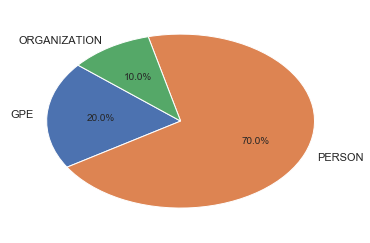

In [14]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

### Introduction to SpaCy

#### What is SpaCy
- NLP library similar to `gensim`, with different implementations
- Focus on creating NLP pipelines to generate models and corpora
- Open-source, with extra libraries and tools
 - Displacy
 - demo @ https://demos.explosion.ai/displacy-ent/

### SpaCy NER

In [15]:
import spacy

In [22]:
npl = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.